In [1]:
"""
Calibration of LoRA fine-tuned models. 

Expects to have trained models using "training.py" script. 
"""

import json
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import os 
from os.path import join
import math
import sys
import numpy as np 
from laplace import Laplace
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../calibratedvisionlora')

from utils import print_trainable_parameters
from dataloaders import create_food_data_loaders
from calibration import fit_laplace_and_compute_predictions, eval_metrics


In [2]:

model_path = '../models/lora_model.pth'

config = dict(
    n_classes = 10,
    batch_size = 2,  # make it smaller if running out of memory when running Laplace
    lora_rank = 2,                
    lora_layers = [10, 11],
    random_projections=False,
    train_size=1024, 
    test_size=2048     # Computing predictions with Laplace is fast once we have the predictive distr.
)

probs_laplace, probs_baseline, targets = \
    fit_laplace_and_compute_predictions(model_path, config, hessian_structure="kron")


eval_metrics(probs_baseline, targets, 'Baseline')
eval_metrics(probs_laplace, targets, 'Laplace')

Downloading: "https://github.com/lukemelas/PyTorch-Pretrained-ViT/releases/download/0.0.2/B_16_imagenet1k.pth" to /root/.cache/torch/hub/checkpoints/B_16_imagenet1k.pth
100%|██████████| 331M/331M [00:01<00:00, 270MB/s] 


Loaded pretrained weights.
device cuda:0
Total number of parameters: 86110474
Number of trainable parameters: 19978
Trainable parameters per layer:
 19978
lora_vit 19978
lora_vit.transformer 12288
lora_vit.transformer.blocks 12288
lora_vit.transformer.blocks.10 6144
lora_vit.transformer.blocks.10.attn 6144
lora_vit.transformer.blocks.10.attn.proj_q 3072
lora_vit.transformer.blocks.10.attn.proj_q.w_a 1536
lora_vit.transformer.blocks.10.attn.proj_q.w_b 1536
lora_vit.transformer.blocks.10.attn.proj_v 3072
lora_vit.transformer.blocks.10.attn.proj_v.w_a 1536
lora_vit.transformer.blocks.10.attn.proj_v.w_b 1536
lora_vit.transformer.blocks.11 6144
lora_vit.transformer.blocks.11.attn 6144
lora_vit.transformer.blocks.11.attn.proj_q 3072
lora_vit.transformer.blocks.11.attn.proj_q.w_a 1536
lora_vit.transformer.blocks.11.attn.proj_q.w_b 1536
lora_vit.transformer.blocks.11.attn.proj_v 3072
lora_vit.transformer.blocks.11.attn.proj_v.w_a 1536
lora_vit.transformer.blocks.11.attn.proj_v.w_b 1536
lora_vi

/workspace/CalibratedVisionLoRA/venv/lib/python3.10/site-packages/laplace/baselaplace.py:413: UserWarning: By default `link_approx` is `probit`. Make sure to set it equals to the way you want to call `la(test_data, pred_type=..., link_approx=...)`.
  warnings.warn(


Fitting Laplace - Done
[Baseline] Acc.: 48.7%; ECE: 13.6%; NLL: 0.941
[Laplace] Acc.: 48.2%; ECE: 7.8%; NLL: 1.05


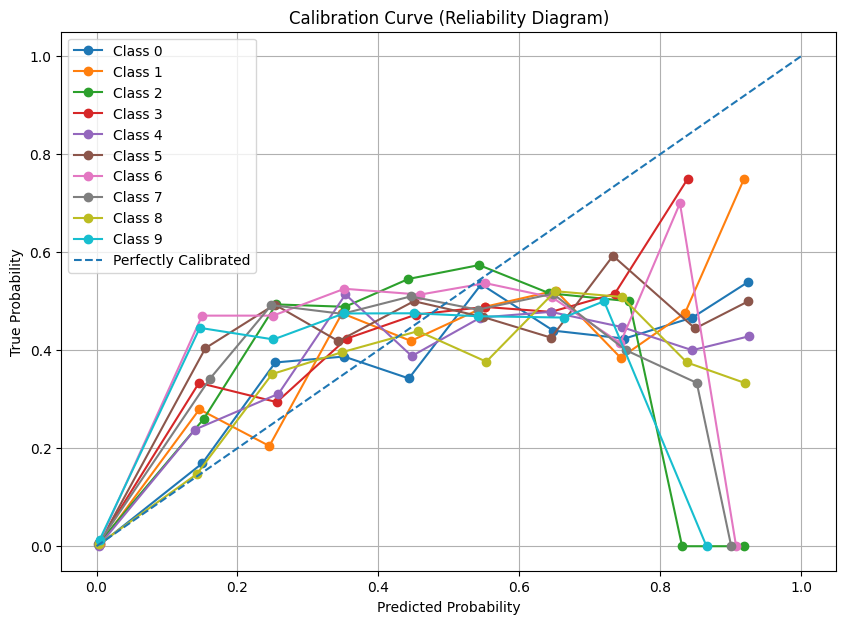

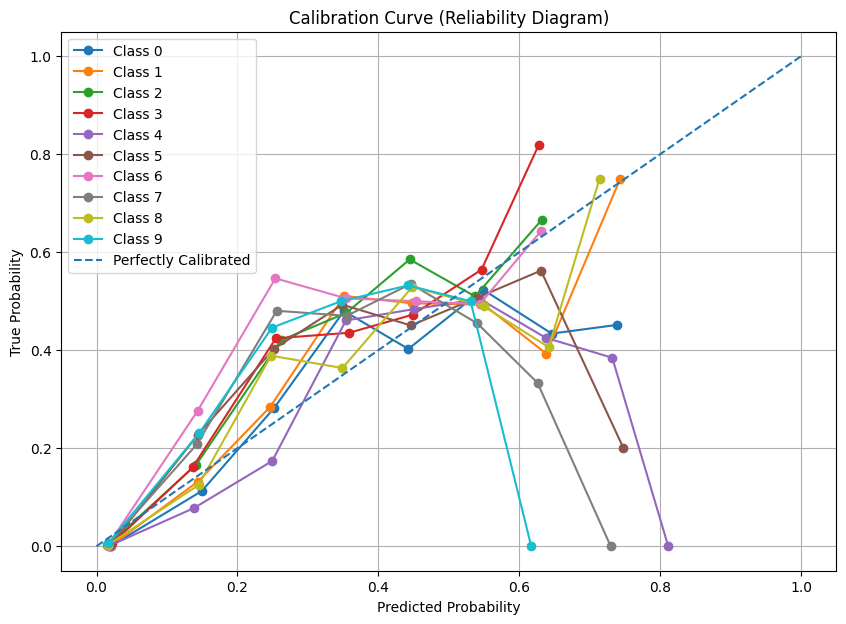

In [3]:
"""
Calibration Plots.
"""

plot_calibration_curve_multiclass(targets.numpy(), probs_baseline.numpy())

plot_calibration_curve_multiclass(targets.numpy(), probs_laplace.numpy())


In [5]:
"""
Lora with 5 clases.
"""

model_path = '../models/lora_model_5classes.pth'

# The same as before excetp for only 5 classes and lora rank 1
config = dict(
    n_classes = 5,
    batch_size = 2,  # make it smaller if running out of memory when running Laplace
    lora_rank = 1,                
    lora_layers = [10, 11],
    random_projections=False,
    train_size=1024, 
    test_size=2048     # Computing predictions with Laplace is fast once we have the covariance matrix
)

probs_laplace, probs_baseline, targets = \
    fit_laplace_and_compute_predictions(model_path, config, hessian_structure="kron")


eval_metrics(probs_baseline, targets, 'Baseline')
eval_metrics(probs_laplace, targets, 'Laplace')



Loaded pretrained weights.
device cuda:0
Total number of parameters: 86100485
Number of trainable parameters: 9989
Trainable parameters per layer:
 9989
lora_vit 9989
lora_vit.transformer 6144
lora_vit.transformer.blocks 6144
lora_vit.transformer.blocks.10 3072
lora_vit.transformer.blocks.10.attn 3072
lora_vit.transformer.blocks.10.attn.proj_q 1536
lora_vit.transformer.blocks.10.attn.proj_q.w_a 768
lora_vit.transformer.blocks.10.attn.proj_q.w_b 768
lora_vit.transformer.blocks.10.attn.proj_v 1536
lora_vit.transformer.blocks.10.attn.proj_v.w_a 768
lora_vit.transformer.blocks.10.attn.proj_v.w_b 768
lora_vit.transformer.blocks.11 3072
lora_vit.transformer.blocks.11.attn 3072
lora_vit.transformer.blocks.11.attn.proj_q 1536
lora_vit.transformer.blocks.11.attn.proj_q.w_a 768
lora_vit.transformer.blocks.11.attn.proj_q.w_b 768
lora_vit.transformer.blocks.11.attn.proj_v 1536
lora_vit.transformer.blocks.11.attn.proj_v.w_a 768
lora_vit.transformer.blocks.11.attn.proj_v.w_b 768
lora_vit.fc 3845
Tra

In [6]:
"""
Lora with Random Projections.
"""

model_path = '../models/lora_model_5classes_random_proj_dim32.pth'

# The same as before excetp for only 5 classes and lora rank 1
config = dict(
    n_classes = 5,
    batch_size = 2,  # make it smaller if running out of memory when running Laplace
    lora_rank = 1,                
    lora_layers = [10, 11],
    random_projections=True,
    trainable_projections=False,
    random_projections_dim=32,
    train_size=1024, 
    test_size=2048      # Computing predictions with Laplace is fast once we have the covariance matrix
)

probs_laplace, probs_baseline, targets = \
    fit_laplace_and_compute_predictions(model_path, config, hessian_structure="kron")


eval_metrics(probs_baseline, targets, 'Baseline')
eval_metrics(probs_laplace, targets, 'Laplace')

Loaded pretrained weights.
device cuda:0
Total number of parameters: 86312101
Number of trainable parameters: 421
Trainable parameters per layer:
 421
lora_vit 421
lora_vit.transformer 256
lora_vit.transformer.blocks 256
lora_vit.transformer.blocks.10 128
lora_vit.transformer.blocks.10.attn 128
lora_vit.transformer.blocks.10.attn.proj_q 64
lora_vit.transformer.blocks.10.attn.proj_q.w_a 32
lora_vit.transformer.blocks.10.attn.proj_q.w_b 32
lora_vit.transformer.blocks.10.attn.proj_v 64
lora_vit.transformer.blocks.10.attn.proj_v.w_a 32
lora_vit.transformer.blocks.10.attn.proj_v.w_b 32
lora_vit.transformer.blocks.11 128
lora_vit.transformer.blocks.11.attn 128
lora_vit.transformer.blocks.11.attn.proj_q 64
lora_vit.transformer.blocks.11.attn.proj_q.w_a 32
lora_vit.transformer.blocks.11.attn.proj_q.w_b 32
lora_vit.transformer.blocks.11.attn.proj_v 64
lora_vit.transformer.blocks.11.attn.proj_v.w_a 32
lora_vit.transformer.blocks.11.attn.proj_v.w_b 32
lora_vit.fc 165
lora_vit.fc.linear2 165
Train

In [2]:
"""
Lora with Trainable Projections.
"""

model_path = '../models/lora_model_5classes_trainable_proj_dim32.pth'

# The same as before excetp for only 5 classes and lora rank 1
config = dict(
    n_classes = 5,
    batch_size = 2,  # make it smaller if running out of memory when running Laplace
    lora_rank = 1,                
    lora_layers = [10, 11],
    random_projections=True,
    trainable_projections=True,
    random_projections_dim=32,
    train_size=1024, 
    test_size=2048      # Computing predictions with Laplace is fast once we have the covariance matrix
)

probs_laplace, probs_baseline, targets = \
    fit_laplace_and_compute_predictions(model_path, config, hessian_structure="kron")


eval_metrics(probs_baseline, targets, 'Baseline')
eval_metrics(probs_laplace, targets, 'Laplace')


Loaded pretrained weights.
device cuda:0
Total number of parameters: 86312101
Number of trainable parameters: 421
Trainable parameters per layer:
 421
lora_vit 421
lora_vit.transformer 256
lora_vit.transformer.blocks 256
lora_vit.transformer.blocks.10 128
lora_vit.transformer.blocks.10.attn 128
lora_vit.transformer.blocks.10.attn.proj_q 64
lora_vit.transformer.blocks.10.attn.proj_q.w_a 32
lora_vit.transformer.blocks.10.attn.proj_q.w_b 32
lora_vit.transformer.blocks.10.attn.proj_v 64
lora_vit.transformer.blocks.10.attn.proj_v.w_a 32
lora_vit.transformer.blocks.10.attn.proj_v.w_b 32
lora_vit.transformer.blocks.11 128
lora_vit.transformer.blocks.11.attn 128
lora_vit.transformer.blocks.11.attn.proj_q 64
lora_vit.transformer.blocks.11.attn.proj_q.w_a 32
lora_vit.transformer.blocks.11.attn.proj_q.w_b 32
lora_vit.transformer.blocks.11.attn.proj_v 64
lora_vit.transformer.blocks.11.attn.proj_v.w_a 32
lora_vit.transformer.blocks.11.attn.proj_v.w_b 32
lora_vit.fc 165
lora_vit.fc.linear2 165
Train

/workspace/CalibratedVisionLoRA/venv/lib/python3.10/site-packages/laplace/baselaplace.py:413: UserWarning: By default `link_approx` is `probit`. Make sure to set it equals to the way you want to call `la(test_data, pred_type=..., link_approx=...)`.
  warnings.warn(


Fitting Laplace - Done
[Baseline] Acc.: 47.0%; ECE: 11.6%; NLL: 0.813
[Laplace] Acc.: 47.4%; ECE: 8.2%; NLL: 0.805


In [8]:
"""
Lora with Trainable Projections & Full Laplace
"""

# To make the fitting faster, does not seem to have a significant impact on the results
config['train_size'] = 100

probs_laplace, probs_baseline, targets = \
    fit_laplace_and_compute_predictions(model_path, config, hessian_structure="kron")


eval_metrics(probs_baseline, targets, 'Baseline')
eval_metrics(probs_laplace, targets, 'Laplace')


Loaded pretrained weights.
device cuda:0
Total number of parameters: 86312101
Number of trainable parameters: 421
Trainable parameters per layer:
 421
lora_vit 421
lora_vit.transformer 256
lora_vit.transformer.blocks 256
lora_vit.transformer.blocks.10 128
lora_vit.transformer.blocks.10.attn 128
lora_vit.transformer.blocks.10.attn.proj_q 64
lora_vit.transformer.blocks.10.attn.proj_q.w_a 32
lora_vit.transformer.blocks.10.attn.proj_q.w_b 32
lora_vit.transformer.blocks.10.attn.proj_v 64
lora_vit.transformer.blocks.10.attn.proj_v.w_a 32
lora_vit.transformer.blocks.10.attn.proj_v.w_b 32
lora_vit.transformer.blocks.11 128
lora_vit.transformer.blocks.11.attn 128
lora_vit.transformer.blocks.11.attn.proj_q 64
lora_vit.transformer.blocks.11.attn.proj_q.w_a 32
lora_vit.transformer.blocks.11.attn.proj_q.w_b 32
lora_vit.transformer.blocks.11.attn.proj_v 64
lora_vit.transformer.blocks.11.attn.proj_v.w_a 32
lora_vit.transformer.blocks.11.attn.proj_v.w_b 32
lora_vit.fc 165
lora_vit.fc.linear2 165
Train